# OCR Text Extraction Project

This notebook demonstrates how to extract text from images using both **Pytesseract** and **EasyOCR** libraries.

## 🎯 Learning Objectives:
- Understand how OCR (Optical Character Recognition) works
- Learn to use Pytesseract for text extraction
- Explore EasyOCR as an alternative OCR solution
- Process single images and save extracted text

## 📋 Prerequisites:
- Install required packages: `pip install -r requirements.txt`
- For Windows: Install Tesseract OCR from [here](https://github.com/UB-Mannheim/tesseract/wiki)

## 1. Import Required Libraries

First, let's import all the necessary libraries for our OCR project.

In [1]:
# Standard libraries
import os
import sys
from pathlib import Path

# Data handling
import pandas as pd
import numpy as np

# Image processing
from PIL import Image
import cv2

# OCR libraries
import pytesseract
import easyocr

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Progress bar
from tqdm import tqdm

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Configure Tesseract Path (Windows Users)

If you're on Windows and Tesseract is not in your system PATH, you need to specify the path to the Tesseract executable.

In [3]:
# Windows Tesseract configuration
# Uncomment and modify the path below if needed

# Common Tesseract installation paths on Windows:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# pytesseract.pytesseract.tesseract_cmd = r'C:\Users\YourUsername\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Test Tesseract installation
try:
    version = pytesseract.get_tesseract_version()
    print(f"✅ Tesseract version: {version}")
except:
    print("❌ Tesseract not found. Please install Tesseract OCR and configure the path.")
    print("Download from: https://github.com/UB-Mannheim/tesseract/wiki")

✅ Tesseract version: 5.5.0.20241111


## 3. Set Up Project Paths

Let's define the paths to our project folders.

In [5]:
# Get the project root directory (parent of notebooks folder)
project_root = Path.cwd().parent

# Define folder paths
images_folder = project_root / "images"
data_folder = project_root / "data"
results_folder = project_root / "results" / "extracted_texts"

# Create results folder if it doesn't exist
results_folder.mkdir(parents=True, exist_ok=True)

print(f"📁 Project root: {project_root}")
print(f"📁 Images folder: {images_folder}")
print(f"📁 Data folder: {data_folder}")
print(f"📁 Results folder: {results_folder}")

# Check if folders exist
print(f"\n📋 Folder status:")
print(f"Images folder exists: {images_folder.exists()}")
print(f"Data folder exists: {data_folder.exists()}")
print(f"Results folder exists: {results_folder.exists()}")

📁 Project root: d:\TrainerDoc\Programming\AI\mdad_b02\projects\OCR_Project
📁 Images folder: d:\TrainerDoc\Programming\AI\mdad_b02\projects\OCR_Project\images
📁 Data folder: d:\TrainerDoc\Programming\AI\mdad_b02\projects\OCR_Project\data
📁 Results folder: d:\TrainerDoc\Programming\AI\mdad_b02\projects\OCR_Project\results\extracted_texts

📋 Folder status:
Images folder exists: True
Data folder exists: True
Results folder exists: True


## 4. Load Image Dataset

Let's load the CSV file containing our image information.

In [6]:
# Load the image dataset CSV
csv_path = data_folder / "imagedataset.csv"

try:
    df = pd.read_csv(csv_path)
    print(f"✅ Successfully loaded {len(df)} records from CSV")
    print(f"\n📊 Dataset preview:")
    print(df.head())
    
    print(f"\n📋 Dataset info:")
    print(f"Number of images: {len(df)}")
    print(f"Columns: {list(df.columns)}")
    
except FileNotFoundError:
    print(f"❌ CSV file not found at: {csv_path}")
    print("Please ensure the imagedataset.csv file exists in the data folder.")

✅ Successfully loaded 2 records from CSV

📊 Dataset preview:
   id          imagename
0   1  sample_text_1.jpg
1   2     MobPhoto_1.png

📋 Dataset info:
Number of images: 2
Columns: ['id', 'imagename']


## 5. Define OCR Functions

Let's create functions for both Pytesseract and EasyOCR text extraction.

In [9]:
def extract_text_pytesseract(image_path):
    """
    Extract text from image using Pytesseract.
    
    Args:
        image_path (str or Path): Path to the image file
    
    Returns:
        str: Extracted text
    """
    try:
        # Open image using PIL
        image = Image.open(image_path)
        
        # Extract text using Pytesseract
        # You can customize OCR settings here
        text = pytesseract.image_to_string(image, lang='eng')
        
        return text.strip()
    
    except Exception as e:
        return f"Error processing image with Pytesseract: {str(e)}"


def extract_text_easyocr(image_path, reader=None):
    """
    Extract text from image using EasyOCR.
    
    Args:
        image_path (str or Path): Path to the image file
        reader: EasyOCR reader object (optional)
    
    Returns:
        str: Extracted text
    """
    try:
        # Initialize EasyOCR reader if not provided
        if reader is None:
            reader = easyocr.Reader(['en'])  # English language
        
        # Extract text using EasyOCR
        results = reader.readtext(str(image_path))
        
        # Combine all detected text
        text = ' '.join([result[1] for result in results])
        
        return text.strip()
    
    except Exception as e:
        return f"Error processing image with EasyOCR: {str(e)}"


def preprocess_image(image_path):
    """
    Basic image preprocessing to improve OCR accuracy.
    
    Args:
        image_path (str or Path): Path to the image file
    
    Returns:
        numpy.ndarray: Preprocessed image
    """
    # Read image using OpenCV
    image = cv2.imread(str(image_path))
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply threshold to get binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresh


print("✅ OCR functions defined successfully!")

✅ OCR functions defined successfully!


## 6. Test OCR with a Single Image

Let's test our OCR functions with a single image to see how they work.

In [7]:
# Initialize EasyOCR reader (this may take a moment on first run)
print("🔄 Initializing EasyOCR reader...")
easy_reader = easyocr.Reader(['en'])
print("✅ EasyOCR reader initialized!")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


🔄 Initializing EasyOCR reader...
✅ EasyOCR reader initialized!


🔍 Testing OCR with image: sample_text_1.jpg
📍 Image path: d:\TrainerDoc\Programming\AI\mdad_b02\projects\OCR_Project\images\sample_text_1.jpg


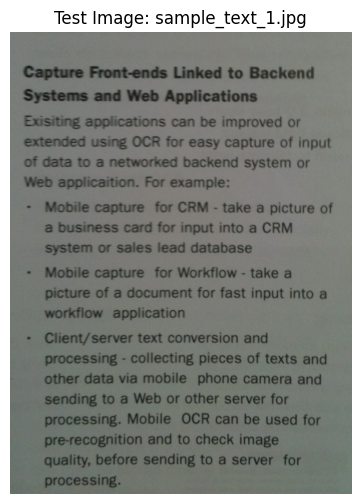


🔄 Extracting text using Pytesseract...

🔄 Extracting text using EasyOCR...


c:\Users\Admin\.conda\envs\text_env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📄 PYTESSERACT RESULTS:
Capture Front-ends Linked to Backend
Systems and Web Applications

Exisiting applications can be improved or
extended using OCR for easy capture of input
of data to a networked backend system or
Web applicaition. For example:

Mobile capture for CRM - take a picture of
a business card for input into a CRM
system or sales lead database

Mobile capture for Workflow - take a
picture of a document for fast input into a
workflow application

Client/server text conversion and
processing - collecting pieces of texts and
other data via mobile phone camera and
sending to a Web or other server for
processing. Mobile OCR can be used for
pre-recognition and to check image
quality, before sending to a server for
processing.

📄 EASYOCR RESULTS:
Capture Front-ends Linked to Backend Systems and Web Applications Bxisiting applications can be improved or extended using OCR for easy capture of input of Cata t0 a networked backend system or Web applicaition. For example: Mobile cap

In [10]:
# Test with the first image in our dataset
if len(df) > 0:
    test_image_name = df.iloc[0]['imagename']
    test_image_path = images_folder / test_image_name
    
    print(f"🔍 Testing OCR with image: {test_image_name}")
    print(f"📍 Image path: {test_image_path}")
    
    if test_image_path.exists():
        # Display the image
        plt.figure(figsize=(10, 6))
        img = mpimg.imread(test_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Test Image: {test_image_name}")
        plt.show()
        
        # Extract text using both methods
        print("\n🔄 Extracting text using Pytesseract...")
        pytesseract_text = extract_text_pytesseract(test_image_path)
        
        print("\n🔄 Extracting text using EasyOCR...")
        easyocr_text = extract_text_easyocr(test_image_path, easy_reader)
        
        # Display results
        print("\n" + "="*50)
        print("📄 PYTESSERACT RESULTS:")
        print("="*50)
        print(pytesseract_text if pytesseract_text else "No text detected")
        
        print("\n" + "="*50)
        print("📄 EASYOCR RESULTS:")
        print("="*50)
        print(easyocr_text if easyocr_text else "No text detected")
        
    else:
        print(f"❌ Test image not found: {test_image_path}")
        print("Please add some sample images to the images/ folder")
else:
    print("❌ No images found in the dataset")

## 7. Save Extracted Text to File

Let's create a function to save the extracted text to a file.

In [10]:
def save_extracted_text(image_id, image_name, pytesseract_text, easyocr_text, output_folder):
    """
    Save extracted text to a file.
    
    Args:
        image_id (int): Image ID from CSV
        image_name (str): Image filename
        pytesseract_text (str): Text extracted by Pytesseract
        easyocr_text (str): Text extracted by EasyOCR
        output_folder (Path): Output folder path
    """
    # Create filename for the text file
    base_name = Path(image_name).stem  # Remove file extension
    output_filename = f"{image_id}_{base_name}_extracted.txt"
    output_path = output_folder / output_filename
    
    # Prepare content
    content = f"""OCR EXTRACTION RESULTS
========================
Image ID: {image_id}
Image Name: {image_name}
Extraction Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

PYTESSERACT RESULTS:
--------------------
{pytesseract_text if pytesseract_text else 'No text detected'}

EASYOCR RESULTS:
----------------
{easyocr_text if easyocr_text else 'No text detected'}

END OF EXTRACTION
=================="""
    
    # Save to file
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(content)
        print(f"✅ Saved: {output_filename}")
    except Exception as e:
        print(f"❌ Error saving {output_filename}: {str(e)}")

print("✅ Save function defined successfully!")

✅ Save function defined successfully!


## 8. Process Single Image and Save Results

Let's process our test image and save the results to a file.

In [11]:
# Process and save the test image results
if len(df) > 0:
    test_row = df.iloc[0]
    test_id = test_row['id']
    test_name = test_row['imagename']
    test_path = images_folder / test_name
    
    if test_path.exists():
        print(f"🔄 Processing and saving results for: {test_name}")
        
        # Extract text (reuse previous results if available)
        if 'pytesseract_text' not in locals():
            pytesseract_text = extract_text_pytesseract(test_path)
            easyocr_text = extract_text_easyocr(test_path, easy_reader)
        
        # Save to file
        save_extracted_text(test_id, test_name, pytesseract_text, easyocr_text, results_folder)
        
        print(f"\n📁 Check the results folder: {results_folder}")
        
    else:
        print(f"❌ Image not found: {test_path}")
else:
    print("❌ No images in dataset to process")

🔄 Processing and saving results for: sample_text_1.jpg
✅ Saved: 1_sample_text_1_extracted.txt

📁 Check the results folder: d:\TrainerDoc\Programming\AI\CAI\DL\dldemo\OCR_Project\results\extracted_texts


## 9. Compare OCR Methods

Let's create a simple comparison of the two OCR methods.

In [12]:
# Create a comparison summary
if 'pytesseract_text' in locals() and 'easyocr_text' in locals():
    print("🔍 OCR METHOD COMPARISON")
    print("=" * 50)
    
    # Character count comparison
    pytess_chars = len(pytesseract_text) if pytesseract_text else 0
    easy_chars = len(easyocr_text) if easyocr_text else 0
    
    print(f"Pytesseract - Characters extracted: {pytess_chars}")
    print(f"EasyOCR - Characters extracted: {easy_chars}")
    
    # Word count comparison
    pytess_words = len(pytesseract_text.split()) if pytesseract_text else 0
    easy_words = len(easyocr_text.split()) if easyocr_text else 0
    
    print(f"Pytesseract - Words extracted: {pytess_words}")
    print(f"EasyOCR - Words extracted: {easy_words}")
    
    print("\n💡 Tips for better OCR results:")
    print("- Use high-resolution images")
    print("- Ensure good contrast between text and background")
    print("- Try image preprocessing for blurry or noisy images")
    print("- EasyOCR often works better for handwritten text")
    print("- Pytesseract is faster for simple printed text")
else:
    print("⚠️ No OCR results available for comparison")

🔍 OCR METHOD COMPARISON
Pytesseract - Characters extracted: 720
EasyOCR - Characters extracted: 84
Pytesseract - Words extracted: 121
EasyOCR - Words extracted: 11

💡 Tips for better OCR results:
- Use high-resolution images
- Ensure good contrast between text and background
- Try image preprocessing for blurry or noisy images
- EasyOCR often works better for handwritten text
- Pytesseract is faster for simple printed text


## 10. Next Steps

Now that you've learned how to process a single image, you can:

1. **Add more images** to the `images/` folder
2. **Update the CSV file** with your image names
3. **Run the batch processing script** (`scripts/process_images.py`) to process all images at once
4. **Experiment with image preprocessing** to improve OCR accuracy
5. **Try different OCR settings** and languages

### Quick Test with Your Own Images:

1. Place an image in the `images/` folder
2. Add its name to the CSV file
3. Run the cells above with your image

In [13]:
# List all files in the results folder
print("📁 Generated files in results folder:")
if results_folder.exists():
    result_files = list(results_folder.glob("*.txt"))
    if result_files:
        for file in result_files:
            print(f"  📄 {file.name}")
    else:
        print("  (No files generated yet)")
else:
    print("  ❌ Results folder not found")

print("\n🎉 OCR notebook setup complete!")
print("🚀 Ready to process your images with OCR!")

📁 Generated files in results folder:
  📄 1_sample_text_1_extracted.txt

🎉 OCR notebook setup complete!
🚀 Ready to process your images with OCR!
